<a href="https://colab.research.google.com/github/leandrodakel/PYTHON/blob/main/atividade_pratica_unidade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Importando bibliotecas necessarias para o projeto
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Estabelecendo uma conexão com o banco de dados SQLite e carregar os dados relevantes para análise.


# Conectando/criando ao banco de dados
conexao = sqlite3.connect('dados_vendas.db')

# Criando um cursor
cursor = conexao.cursor()

# # Criando uma tabela para receber os dados
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
  id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
  data_venda DATE,
  produto TEXT,
  categoria TEXT,
  valor_venda REAL
  )
''')


# Checando se a tabela está vazia antes de inserir informação para evitar duplicatas
cursor.execute("SELECT COUNT(*) FROM vendas1")
count = cursor.fetchone()[0]

if count == 0:

  # Inserindo alguns dados na tabela 'vendas1'
  cursor.execute('''
  INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
  ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
  ('2023-01-05', 'Produto B', 'Roupas', 350.00),
  ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
  ('2023-03-15', 'Produto D', 'Livros', 200.00),
  ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
  ('2023-04-02', 'Produto F', 'Roupas', 400.00),
  ('2023-05-05', 'Produto G', 'Livros', 150.00),
  ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
  ('2023-07-20', 'Produto I', 'Roupas', 600.00),
  ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
  ('2023-09-30', 'Produto K', 'Livros', 300.00),
  ('2023-10-05', 'Produto L', 'Roupas', 450.00),
  ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
  ('2023-12-20', 'Produto N', 'Livros', 250.00);
  ''')

# Confirmando as mudanças na tabela
conexao.commit()

# Vizualizando a tabela vendas1 para uma análise de dados
selecionar_vendas = "SELECT * FROM vendas1"
cursor.execute(selecionar_vendas)
vendas = cursor.fetchall()
for venda in vendas:
  print(venda)

(1, '2023-01-01', 'Produto A', 'Eletrônicos', 1500.0)
(2, '2023-01-05', 'Produto B', 'Roupas', 350.0)
(3, '2023-02-10', 'Produto C', 'Eletrônicos', 1200.0)
(4, '2023-03-15', 'Produto D', 'Livros', 200.0)
(5, '2023-03-20', 'Produto E', 'Eletrônicos', 800.0)
(6, '2023-04-02', 'Produto F', 'Roupas', 400.0)
(7, '2023-05-05', 'Produto G', 'Livros', 150.0)
(8, '2023-06-10', 'Produto H', 'Eletrônicos', 1000.0)
(9, '2023-07-20', 'Produto I', 'Roupas', 600.0)
(10, '2023-08-25', 'Produto J', 'Eletrônicos', 700.0)
(11, '2023-09-30', 'Produto K', 'Livros', 300.0)
(12, '2023-10-05', 'Produto L', 'Roupas', 450.0)
(13, '2023-11-15', 'Produto M', 'Eletrônicos', 900.0)
(14, '2023-12-20', 'Produto N', 'Livros', 250.0)


In [28]:
# Convertendo a tabela 'vendas1' em um DataFrame do pandas
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

# Exibindo as linhas do DataFrame
print(df_vendas.head(14))

    id_venda  data_venda    produto    categoria  valor_venda
0          1  2023-01-01  Produto A  Eletrônicos       1500.0
1          2  2023-01-05  Produto B       Roupas        350.0
2          3  2023-02-10  Produto C  Eletrônicos       1200.0
3          4  2023-03-15  Produto D       Livros        200.0
4          5  2023-03-20  Produto E  Eletrônicos        800.0
5          6  2023-04-02  Produto F       Roupas        400.0
6          7  2023-05-05  Produto G       Livros        150.0
7          8  2023-06-10  Produto H  Eletrônicos       1000.0
8          9  2023-07-20  Produto I       Roupas        600.0
9         10  2023-08-25  Produto J  Eletrônicos        700.0
10        11  2023-09-30  Produto K       Livros        300.0
11        12  2023-10-05  Produto L       Roupas        450.0
12        13  2023-11-15  Produto M  Eletrônicos        900.0
13        14  2023-12-20  Produto N       Livros        250.0


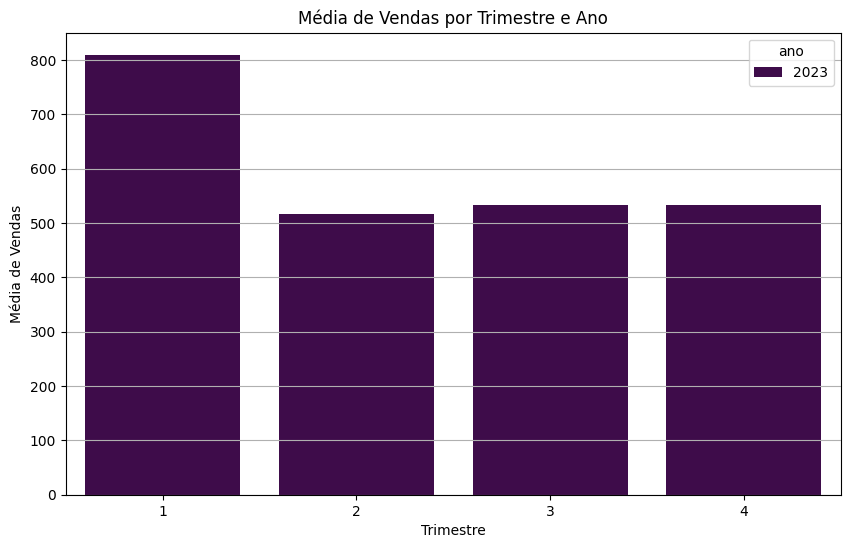

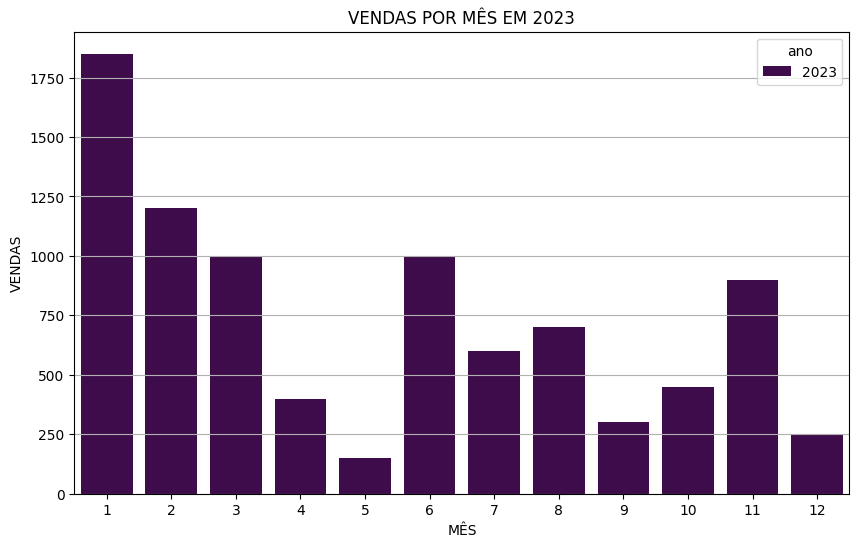

In [30]:
# Definindo a coluna 'data_venda' como tipo datatime
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

# Extraindo o ano e o trimestre de 'data_vendas'
df_vendas['ano'] = df_vendas['data_venda'].dt.year
df_vendas['trimestre'] = df_vendas['data_venda'].dt.quarter

media_vendas_trimestral = df_vendas.groupby(['ano', 'trimestre'])['valor_venda'].mean().reset_index()

# Gráfico de barras para comparar trimestres dentro de um ano
plt.figure(figsize=(10, 6))
sns.barplot(data=media_vendas_trimestral, x='trimestre', y='valor_venda', hue='ano', palette='viridis')
plt.title('Média de Vendas por Trimestre e Ano')
plt.xlabel('Trimestre')
plt.ylabel('Média de Vendas')
plt.grid(axis='y')
plt.show()

# Agrupando por mês e somando as vendas
df_vendas['mes'] = df_vendas['data_venda'].dt.month
soma_vendas_mensal = df_vendas.groupby(['ano', 'mes'])['valor_venda'].sum().reset_index()

# Gráfico de barras para comparar meses dentro do ano
plt.figure(figsize=(10, 6))
sns.barplot(data=soma_vendas_mensal, x='mes', y='valor_venda', hue='ano', palette='viridis')
plt.title('VENDAS POR MÊS EM 2023')
plt.xlabel('MÊS')
plt.ylabel('VENDAS')
plt.grid(axis='y')
plt.show()

In [31]:
 # Convertendo a coluna 'categoria' em uma série do pandas
series_categoria = df_vendas['categoria']
print(series_categoria)

0     Eletrônicos
1          Roupas
2     Eletrônicos
3          Livros
4     Eletrônicos
5          Roupas
6          Livros
7     Eletrônicos
8          Roupas
9     Eletrônicos
10         Livros
11         Roupas
12    Eletrônicos
13         Livros
Name: categoria, dtype: object


In [32]:
# Convertendo a coluna 'valor_venda' em uma série do pandas
series_valor_venda = df_vendas['valor_venda']
print(series_valor_venda)

0     1500.0
1      350.0
2     1200.0
3      200.0
4      800.0
5      400.0
6      150.0
7     1000.0
8      600.0
9      700.0
10     300.0
11     450.0
12     900.0
13     250.0
Name: valor_venda, dtype: float64


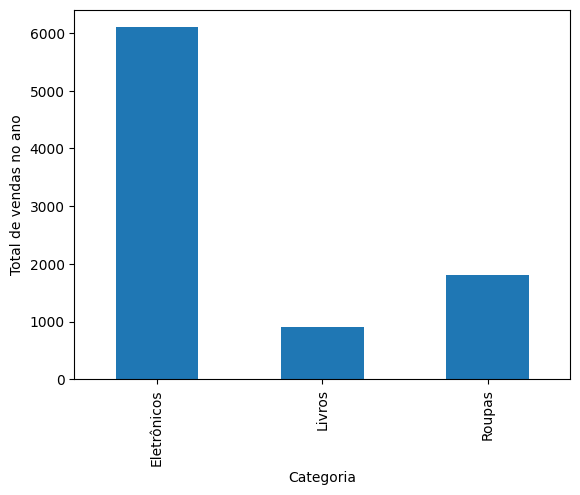

In [12]:
# Definindo/exibindo qual a categoria que mais receita produz
df_vendas.groupby('categoria')['valor_venda'].sum().plot(kind='bar', xlabel='Categoria', ylabel='Total de vendas no ano')

plt.show()